<a href="https://colab.research.google.com/github/krislars/compuphys/blob/main/Percolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Why: The Physics

The physics of percolation is simple. If we have a lattice of sites, what fraction of the sites must be allowed for a cluster of allowed sites to span a space?  Here, we will define a cluster as sites connected by a path that moves up, down, left, or right.  That is, movement diagonally is not allowed. Many systems are analogous to percolation, such as the motion of groundwater through soil.


## How: The Method

The percolation problem uses a powerful tool: random number generation.  We will generate an array of random numbers, which defaults to the span from zero to one.  Then, we will choose a probability $p$ of whether a site is allowed or not and assign sites as being one or zero based on whether the random number is below or above the probability.  The probability can be interpreted as the density or concentration of allowable sites.

Figuring out if sites are connected is harder, but here we will use a brute-strength method.  We will first seed (or 'irrigate') one edge with twos.  We will choose sites randomly, and if they are zero, do nothing.  If they are one, we will check all four neighbors and set the site to the maximum of the neighbors.  Eventually, we will see twos percolate through the system.

## What: The Code

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import random

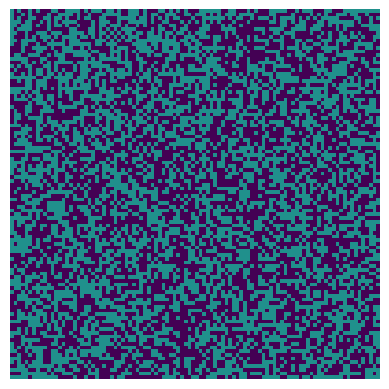

In [13]:
size=100
p=0.5
z=np.random.random([size,size])
z[z<p]=1.0
z[z!=1.0]=0.0
plt.imshow(z,vmax=2)
plt.axis('off')
plt.show()

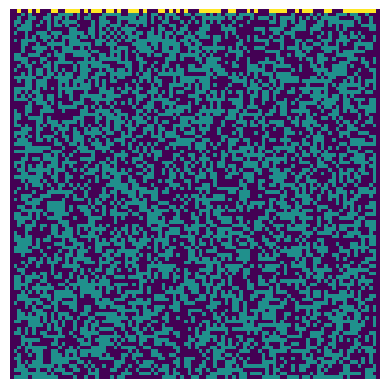

In [14]:
z[:,0],z[:,size-1]=0.0,0.0 # prevent water from leaving the sides
z[0,:]=np.where(z[0,:]==1.0,2,z[0,:]) # irrigate the first row by replacing ones with twos
plt.imshow(z)
plt.axis('off')
plt.show()

You should run the cell below a few times to see what happens.

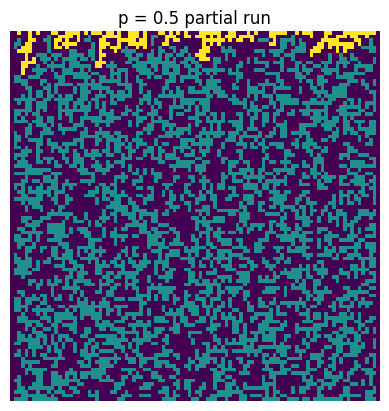

In [15]:
for i in range(10*size**2): # each site checked several times
    x=random.randint(1,size-1) # skip top irrigated row
    y=random.randint(1,size-2) # skip the sides
    if z[x,y]==1.0: # don't change the zeros, twos are already checked
        if x==size-1: # bottom row
            z[x,y]=max(z[x,y+1],z[x-1,y],z[x,y-1])
        else:
            z[x,y]=max(z[x+1,y],z[x,y+1],z[x-1,y],z[x,y-1])
plt.imshow(z)
plt.title('p = '+str(p)+' partial run')
plt.axis('off')
plt.show()

Now what we want to do is reinitialize and keep checking sites until checking every site yields no changes. If there are any twos in the last row, the cluster spans.

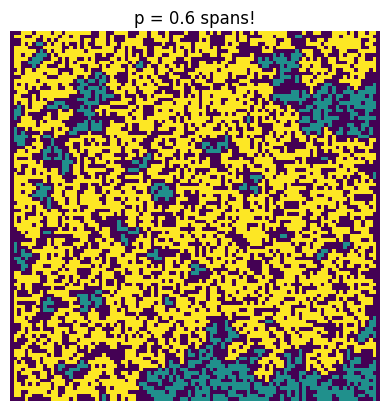

In [18]:
size=100 # PLAY HERE
p=0.6 # PLAY HERE
z=np.random.random([size,size])
z[z<p]=1.0
z[z!=1.0]=0.0
z[:,0],z[:,size-1]=0.0,0.0 # prevent water from leaving the sides
z[0,:]=np.where(z[0,:]==1.0,2,z[0,:]) # irrigate the first row by replacing ones with twos
flipped=True
while flipped==True:
    flipped=False
    for i in range(10*size**2): # each site checked several times
        x=random.randint(1,size-1) # skip top irrigated row
        y=random.randint(1,size-2) # skip the sides
        if z[x,y]==1.0: # don't change the zeros, twos are already checked
            if x==size-1: # bottom row
                z[x,y]=max(z[x,y+1],z[x-1,y],z[x,y-1])
            else:
                z[x,y]=max(z[x+1,y],z[x,y+1],z[x-1,y],z[x,y-1])
            if z[x,y]==2.0: # did it change?
                flipped=True
plt.imshow(z)
if 2.0 in z[size-1,:]: # check last row to see if it spans
    plt.title('p = '+str(p)+' spans!')
else:
    plt.title('p = '+str(p)+' does not span')
plt.axis('off')
plt.show()

Now try several values of $p$ to find the critical density for a spanning cluster.  You should notice that some values always span, some values never span, and some values sometimes span.  How should we handle that?  

Next try several different cluster sizes.  How does the critical density depend on the size of the system?

## So What: The Take-Home Message

The behavior near the critical density is an example of a second-order phase transition.